<a href="https://colab.research.google.com/github/sanamsabooni/Thesis_ErrorDetection/blob/main/Thesis_ErrorDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os

In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')

directory_path = "/content/drive/My Drive/Colab Notebooks/A4988SanamFormatOnly"

# List to store the file names
file_list = []

# Loop through the directory and add .xlsx files to the list
for file in os.listdir(directory_path):
    if file.endswith(".xlsx"):
        file_list.append(file)

# Print the names of the files in the list
for file_name in file_list:
    print(file_name)


Mounted at /content/drive
Jupyter_BS_1_A4988_1_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_1_A4988_2_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_2_A4988_16_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_2_A4988_1_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_1_A4988_4_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_1_A4988_8_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_1_A4988_16_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_2_A4988_2_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_2_A4988_8_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_4_A4988_1_5.0mm_60rpm_4000rpms_.xlsx
Jupyter_BS_2_A4988_4_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_3_A4988_1_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_4_A4988_16_5.0mm_500rpm_4000rpms_.xlsx
Jupyter_BS_3_A4988_2_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_4_A4988_1_5.0mm_500rpm_4000rpms_.xlsx
Jupyter_BS_3_A4988_4_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_3_A4988_16_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_3_A4988_8_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_4_A4988_16_5.0mm_60rpm_4000rpms_.xlsx
Jupyter_BS_5_A4988_16_5.0mm_500rpm_4000rpms_.xlsx
Jupyt

In [ ]:
#combine all .xlsx files in the specified directory into a single file
dfs = []

for file in os.listdir(directory_path):
    if file.endswith('.xlsx'):
        file_path = os.path.join(directory_path, file)
        df = pd.read_excel(file_path)
        dfs.append(df)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default sty

In [ ]:
#!pip install openpyxl

giant_df = pd.concat(dfs, ignore_index=True)
giant_file_path = os.path.join(directory_path, 'ballscrew_giant_file.csv')
giant_df.to_csv(giant_file_path, index=False)

In [ ]:
import os
file_name = "ballscrew_giant_file.csv"
absolute_path = os.path.abspath(file_name)
print(absolute_path)

/content/ballscrew_giant_file.csv


In [ ]:
import pandas as pd

# Replace 'ballscrew_giant_file.csv' with the path
data_b = pd.read_csv('/content/drive/My Drive/Colab Notebooks/A4988SanamFormatOnly/ballscrew_giant_file.csv')
print(data_b.head())



   commanded position  theoretical position  actual position  error actual  \
0                 0.0              0.000000            0.000         0.000   
1                 0.0              0.007324            0.000         0.000   
2                 0.0              0.002441            0.001         0.001   
3                 0.0              0.002441            0.009         0.009   
4                 0.0              0.006714            0.019         0.019   

   error theoretical      time  
0           0.000000  0.000009  
1           0.007324  0.001041  
2           0.002441  0.002041  
3           0.002441  0.003041  
4           0.006714  0.004041  


In [ ]:
data_b

,commanded position,theoretical position,actual position,error actual,error theoretical,time
0,0.000000,0.000000,0.000,0.000000,0.000000,0.000009
1,0.000000,0.007324,0.000,0.000000,0.007324,0.001041
2,0.000000,0.002441,0.001,0.001000,0.002441,0.002041
3,0.000000,0.002441,0.009,0.009000,0.002441,0.003041
4,0.000000,0.006714,0.019,0.019000,0.006714,0.004041
...,...,...,...,...,...,...
4807476,0.003125,0.007324,0.004,0.000875,0.004199,65.215041
4807477,0.003125,0.004272,0.001,-0.002125,0.001147,65.216041
4807478,0.000000,0.003052,-0.002,-0.002000,0.003052,65.217041
4807479,0.000000,0.000610,-0.005,-0.005000,0.000610,65.218041


In [ ]:
for i in range(2):
    data_b.drop(data_b.columns[len(data_b.columns)-1], axis=1, inplace = True)

In [ ]:
data_b.rename(columns={'error actual':'error'}, inplace=True)

In [ ]:
data_b

,commanded position,theoretical position,actual position,error
0,0.000000,0.000000,0.000,0.000000
1,0.000000,0.007324,0.000,0.000000
2,0.000000,0.002441,0.001,0.001000
3,0.000000,0.002441,0.009,0.009000
4,0.000000,0.006714,0.019,0.019000
...,...,...,...,...
4807476,0.003125,0.007324,0.004,0.000875
4807477,0.003125,0.004272,0.001,-0.002125
4807478,0.000000,0.003052,-0.002,-0.002000
4807479,0.000000,0.000610,-0.005,-0.005000


from matplotlib import pyplot as plt
_df_0['commanded position'].plot(kind='hist', bins=20, title='commanded position')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['theoretical position'].plot(kind='hist', bins=20, title='theoretical position')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['actual position'].plot(kind='hist', bins=20, title='actual position')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['error'].plot(kind='hist', bins=20, title='error')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='commanded position', y='theoretical position', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='theoretical position', y='actual position', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='actual position', y='error', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['commanded position'].plot(kind='line', figsize=(8, 4), title='commanded position')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['theoretical position'].plot(kind='line', figsize=(8, 4), title='theoretical position')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['actual position'].plot(kind='line', figsize=(8, 4), title='actual position')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['error'].plot(kind='line', figsize=(8, 4), title='error')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Drop rows where 'error' is greater than 20
data_b = data_b[data_b['error'] <= 20]
data_b

,commanded position,theoretical position,actual position,error
0,0.000000,0.000000,0.000,0.000000
1,0.000000,0.007324,0.000,0.000000
2,0.000000,0.002441,0.001,0.001000
3,0.000000,0.002441,0.009,0.009000
4,0.000000,0.006714,0.019,0.019000
...,...,...,...,...
4807476,0.003125,0.007324,0.004,0.000875
4807477,0.003125,0.004272,0.001,-0.002125
4807478,0.000000,0.003052,-0.002,-0.002000
4807479,0.000000,0.000610,-0.005,-0.005000


In [ ]:
# Extract the features (X) and target (Y) for ballscrew
X_b = data_b.iloc[:, :-1].values  # Use all columns except the last one as features
Y_b = data_b.iloc[:, -1].values  # Use the last column as the target

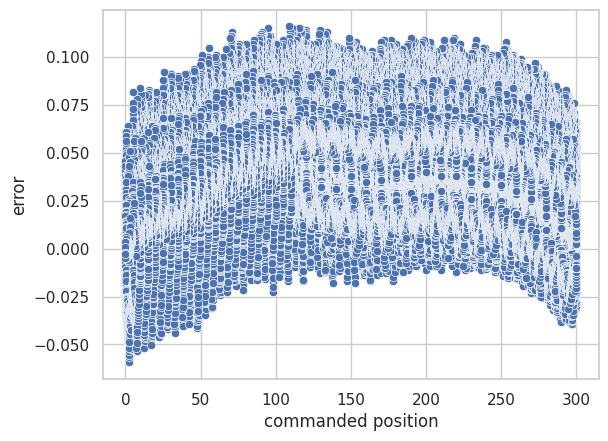

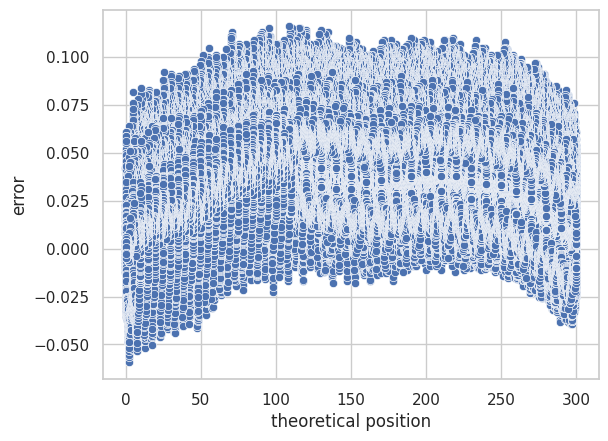

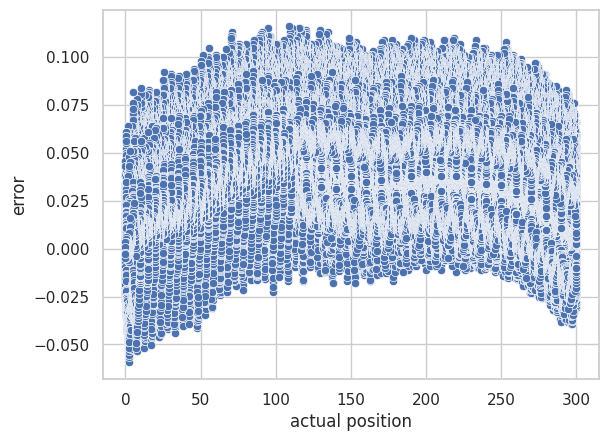

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn styles for the plots
sns.set_theme(style="whitegrid")

# Scatter plot for each feature against the target variable "error"
# Feature: "commanded position" vs "error"
sns.scatterplot(x=data_b['commanded position'], y=data_b['error'])
plt.show()

# Feature: "theoretical position" vs "error"
sns.scatterplot(x=data_b['theoretical position'], y=data_b['error'])
plt.show()

# Feature: "actual position" vs "error"
sns.scatterplot(x=data_b['actual position'], y=data_b['error'])
plt.show()


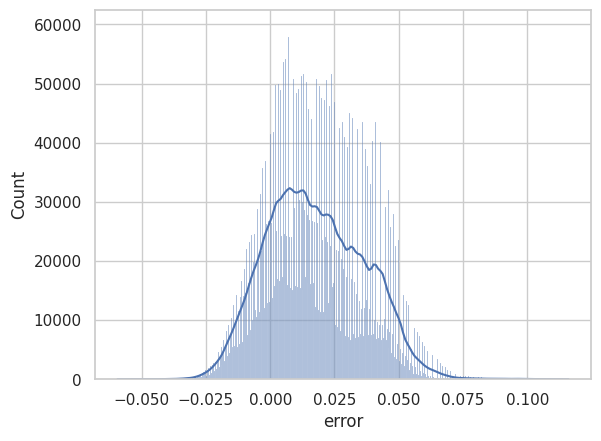

In [ ]:
#Histogram
sns.histplot(data_b['error'], kde=True)
plt.show()

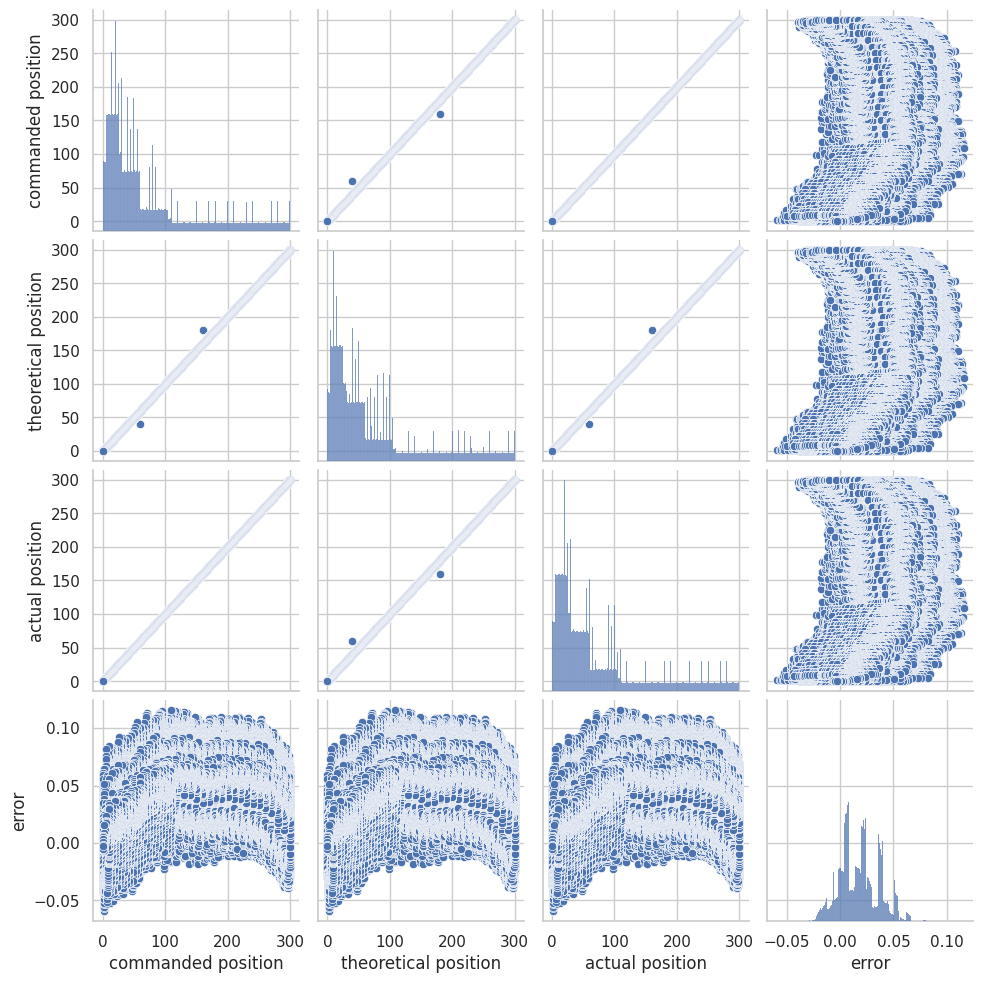

In [ ]:
# Seaborn Pair Plot
sns.pairplot(data_b)
plt.show()

In [ ]:
# Checking skewness
check_skew = (data_b.skew(axis=0, skipna=True, numeric_only=True))
print(check_skew)

commanded position      1.360620
theoretical position    1.360796
actual position         1.360216
error                   0.240687
dtype: float64


In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
fit = std_scaler.fit(data_b)
output = std_scaler.transform(data_b)
data_b = pd.DataFrame(output, columns=data_b.columns, index=list(data_b.index.values))

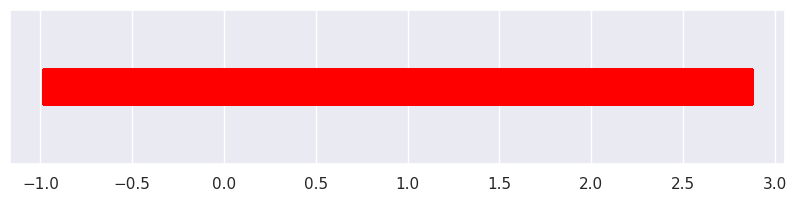

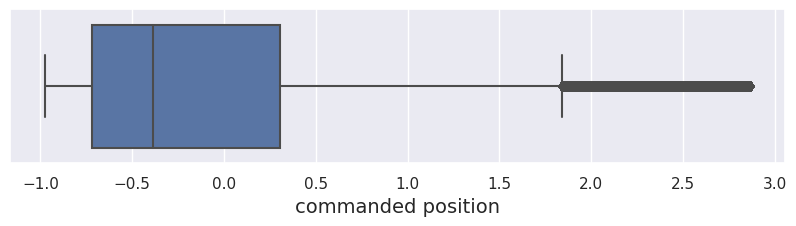

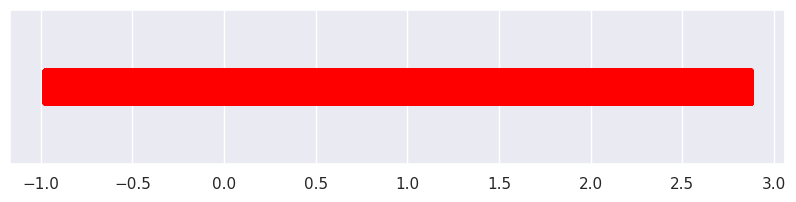

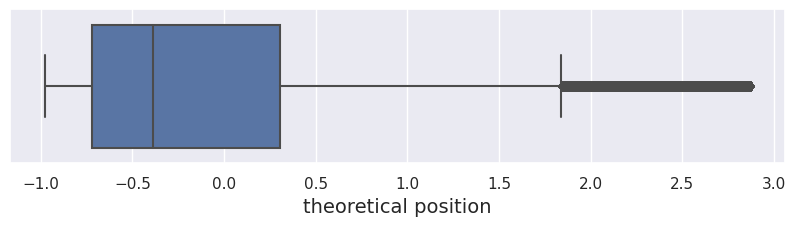

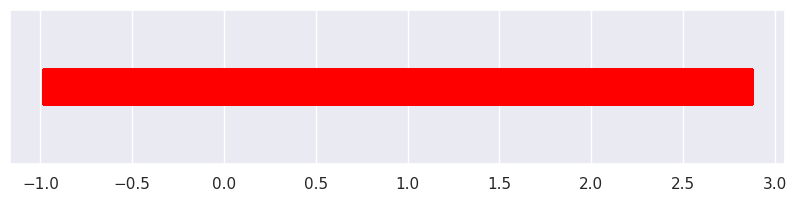

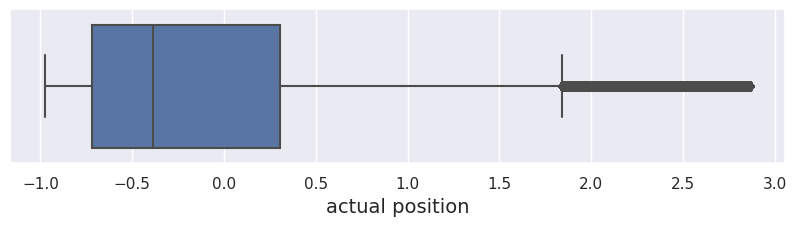

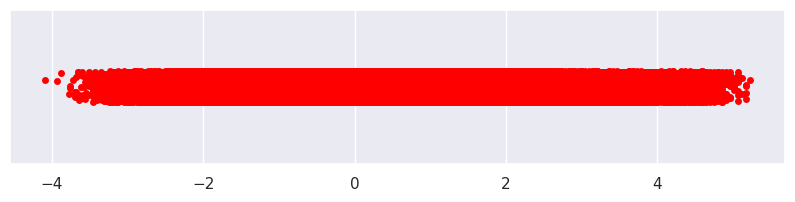

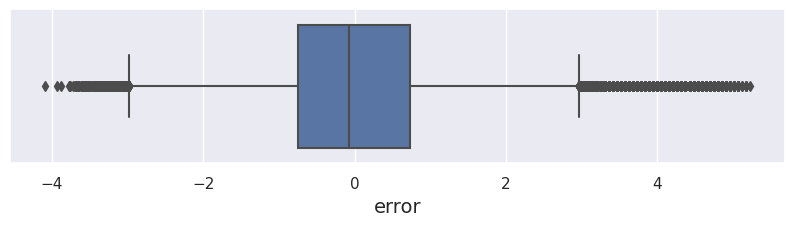

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visuallization for outliers by using stripplot & boxplot (Seaborn)
for feature in data_b.columns:
    sns.set(rc={'figure.figsize':(10, 2), "axes.labelsize":14})
    fig = sns.stripplot(data=data_b, x=feature, color='red')
    fig.set(xlabel='')
    plt.show()
    fig = sns.boxplot(data=data_b, x=feature)
    plt.show()
    print('\n')

In [ ]:
# Detecting outliers
def detect_outlier(data_b):
    Q1, Q3 = np.percentile(data_b, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    outlier = data_b[((data_b<lower_bound) | (data_b>upper_bound))]
    return outlier

for feature in data_b.columns:
    outlier = detect_outlier(data_b[feature])
    print('Name of column: '+ feature)
    print('Number of outliers: '+ str(len(outlier)))
    print('Max outlier value: '+ str(outlier.max()))
    print('Min outlier value: '+ str(outlier.min()))
    print('\n')

Name of column: commanded position
Number of outliers: 449001
Max outlier value: 2.865087300773566
Min outlier value: 1.8417101983535578


Name of column: theoretical position
Number of outliers: 450668
Max outlier value: 2.8674737481717365
Min outlier value: 1.8436630652084616


Name of column: actual position
Number of outliers: 448635
Max outlier value: 2.8647219918505002
Min outlier value: 1.8424604253324697


Name of column: error
Number of outliers: 9223
Max outlier value: 5.221935271197018
Min outlier value: -4.088102767768589




In [ ]:
# Treating outliers(because the data is skewed, we use Median as center point for treating outliers)
for i in data_b.columns:
    outlier = detect_outlier(data_b[i])
    data_b.loc[list(outlier.keys()), i] = data_b[i].median()

In [ ]:
# Checking outliers
for feature in data_b.columns:
    outlier = detect_outlier(data_b[feature])
    print('Name of column: '+ feature)
    print('Number of outliers: '+ str(len(outlier)))
    print('Max outlier value: '+ str(outlier.max()))
    print('Min outlier value: '+ str(outlier.min()))
    print('\n')

Name of column: commanded position
Number of outliers: 377127
Max outlier value: 1.8416902042713754
Min outlier value: 0.9883627708120227


Name of column: theoretical position
Number of outliers: 374991
Max outlier value: 1.8397812371065037
Min outlier value: 0.9918790702645496


Name of column: actual position
Number of outliers: 377036
Max outlier value: 1.8424476304295139
Min outlier value: 0.989808092390124


Name of column: error
Number of outliers: 794
Max outlier value: 2.965760692972771
Min outlier value: -2.9799229014056667




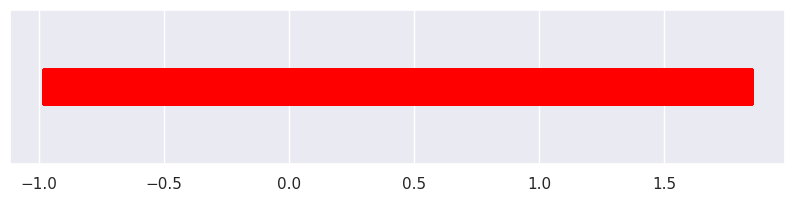

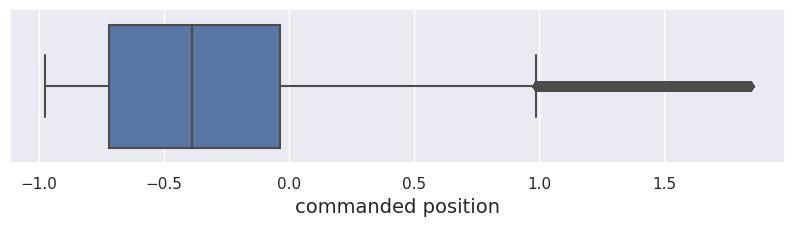

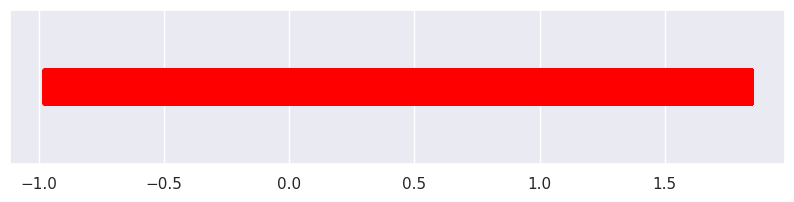

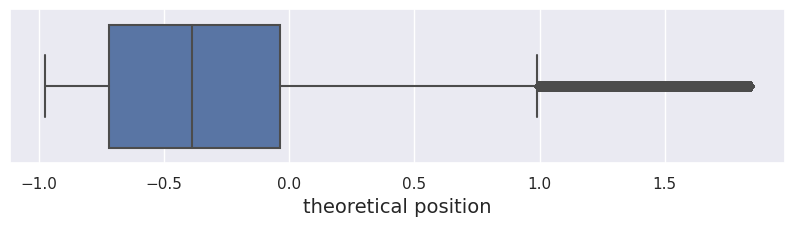

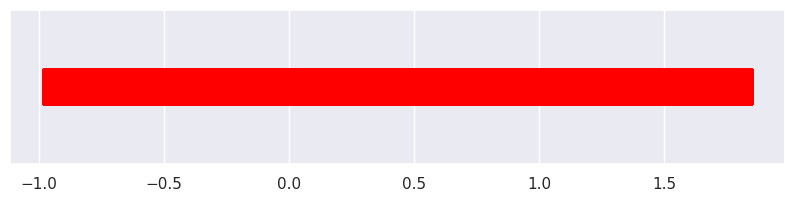

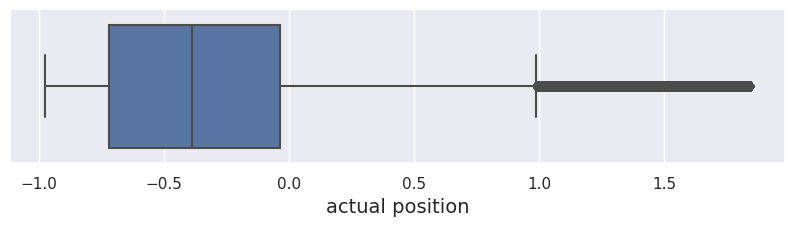

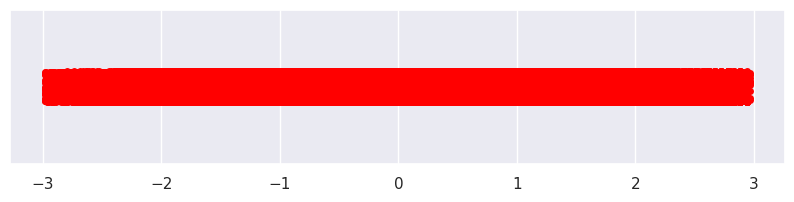

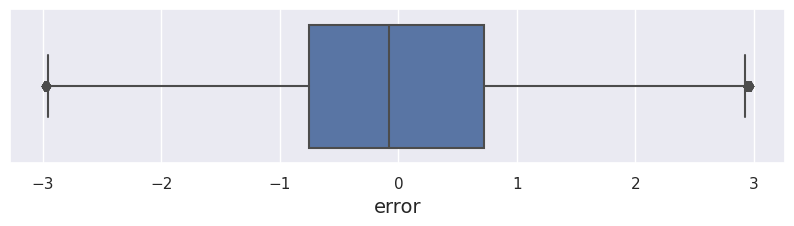

In [ ]:
# Visuallization by using stripplot & boxplot (Seaborn)
for feature in data_b.columns:
    sns.set(rc={'figure.figsize':(10, 2), "axes.labelsize":14})
    fig = sns.stripplot(data=data_b, x=feature, color='red')
    fig.set(xlabel='')
    plt.show()
    fig = sns.boxplot(data=data_b, x=feature)
    plt.show()
    print('\n')

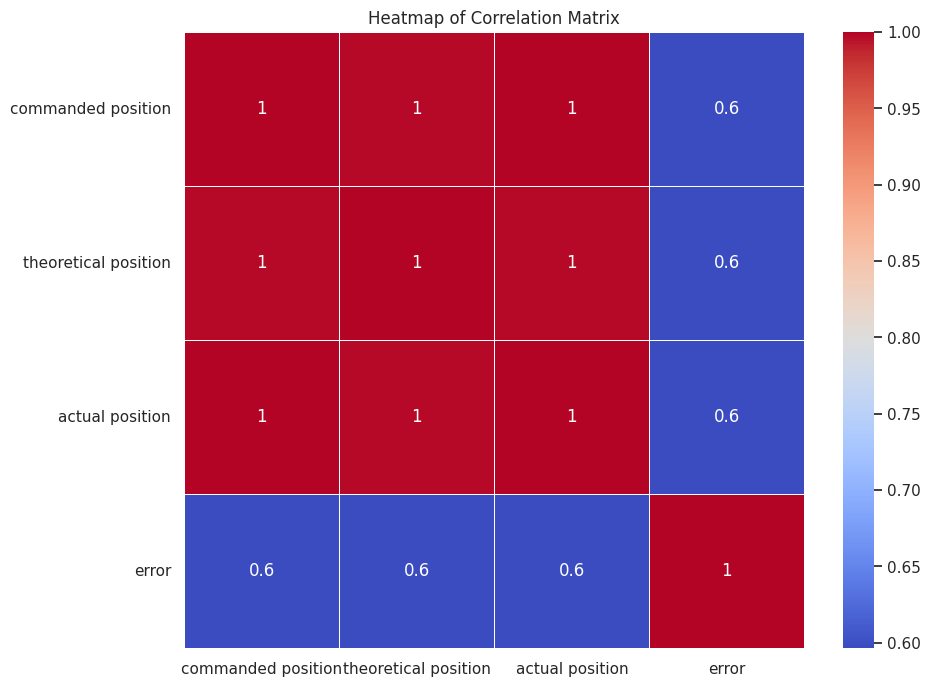

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data_b.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
# Filtering features which are less related to the target with correlation check
corr_variable = 0.4
corrwith_target = data_b.corrwith(data_b['error'])
features_to_drop = (corrwith_target[(corrwith_target<corr_variable)&(corrwith_target>-(corr_variable))]).index.values.tolist()
data_b.drop(features_to_drop, axis=1, inplace=True)
print('Number of the features:', len(data_b.columns))

Number of the features: 4


In [ ]:
# Normalize the data
scaler_X_b = MinMaxScaler()
scaler_Y_b = MinMaxScaler()
X_b = scaler_X_b.fit_transform(X_b)
Y_b = scaler_Y_b.fit_transform(Y_b.reshape(-1, 1))

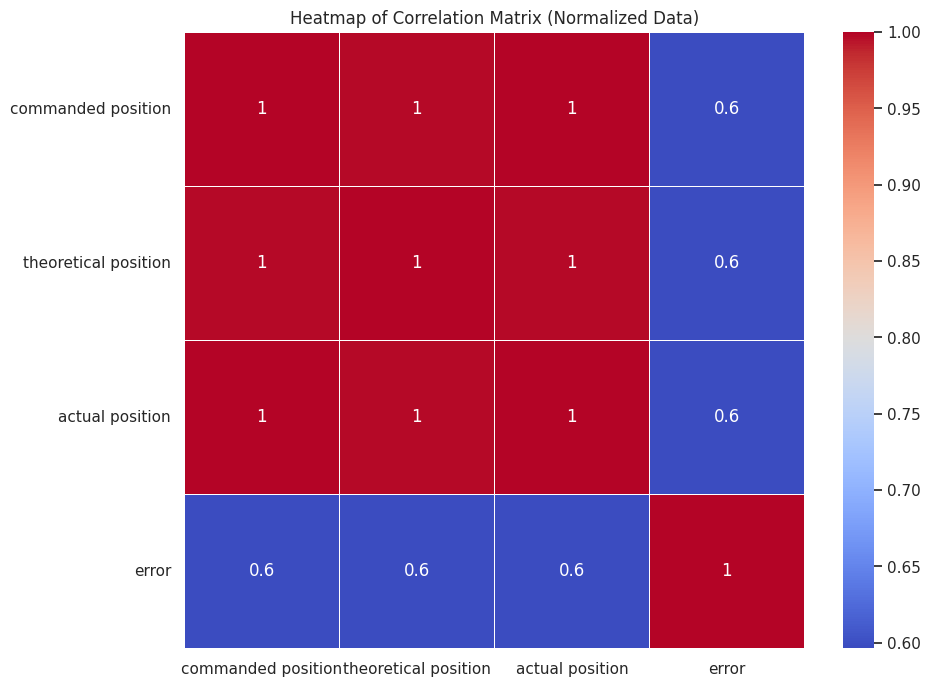

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features (Note that we are not normalizing the target variable 'error')
data_b_normalized = pd.DataFrame(scaler.fit_transform(data_b.iloc[:, :-1]), columns=data_b.columns[:-1])

# Add the target variable 'error' back into the DataFrame
data_b_normalized['error'] = data_b['error'].values

# Now let's visualize the normalized data with a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix_normalized = data_b_normalized.corr()
sns.heatmap(correlation_matrix_normalized, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix (Normalized Data)')
plt.show()


In [ ]:
# Seaborn styles for the plots
sns.set_theme(style="whitegrid")

# Scatter plot for each feature against the target variable "error"
# Feature: "commanded position" vs "error"
sns.scatterplot(x=data_l['commanded position'], y=data_l['error'])
plt.show()

# Feature: "theoretical position" vs "error"
sns.scatterplot(x=data_l['theoretical position'], y=data_l['error'])
plt.show()

# Feature: "actual position" vs "error"
sns.scatterplot(x=data_l['actual position'], y=data_l['error'])
plt.show()


NameError: ignored

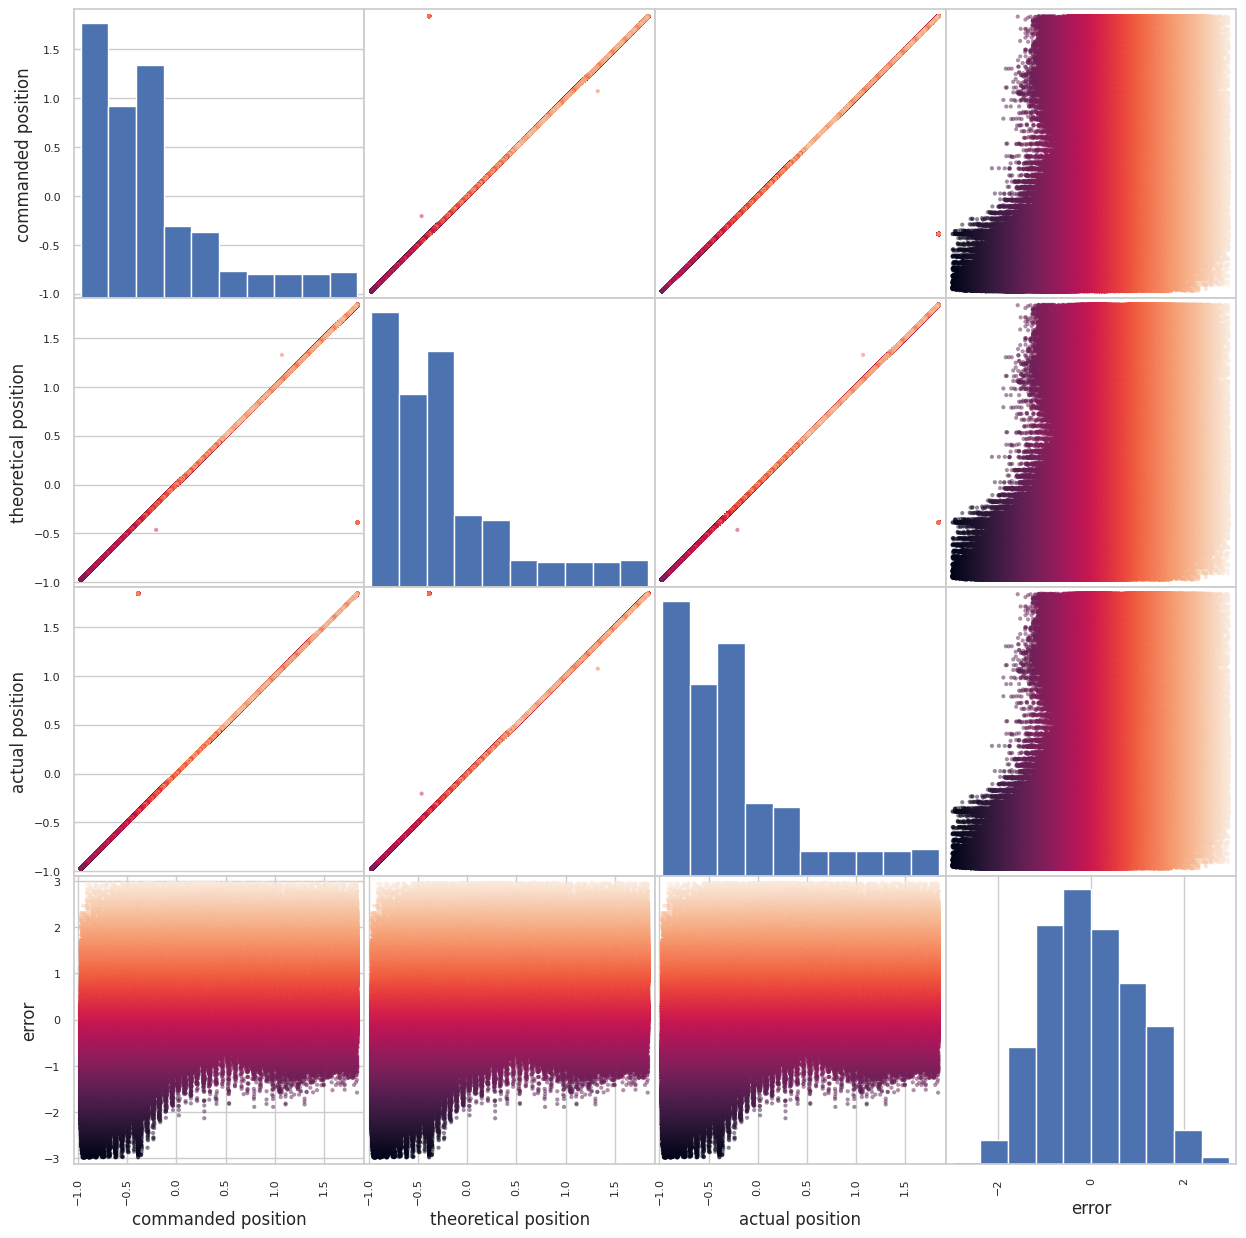

In [ ]:
from pandas.plotting import scatter_matrix
# Visuallization by using stripplot & boxplot (Seaborn)
scatter_matrix(data_b,
               c = data_b['error'],
               alpha=0.5,
               figsize=(15, 15),
               diagonal='hist')
plt.show()

In [ ]:
# Split data into training and testing sets
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(X_b, Y_b, test_size=0.2, random_state=42)

Epoch 1/10
96150/96150 [==============================] - 303s 3ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 2/10
96150/96150 [==============================] - 304s 3ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 3/10
96150/96150 [==============================] - 289s 3ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 4/10
96150/96150 [==============================] - 310s 3ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 5/10
96150/96150 [==============================] - 290s 3ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 6/10
96150/96150 [==============================] - 304s 3ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 7/10
96150/96150 [==============================] - 310s 3ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 8/10
96150/96150 [==============================] - 298s 3ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 9/10
96150/96150 [==============================] - 295s 3ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 10/10
96150/96150 [=====================

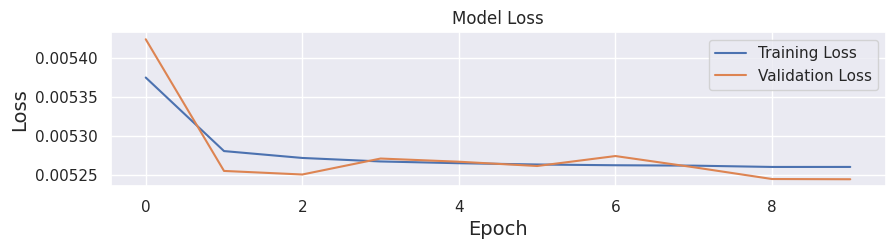

In [ ]:
import matplotlib.pyplot as plt

# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_b.shape[1], activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))  # Assuming it's a regression task with one output

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and save the history
history = model.fit(X_train_b, Y_train_b, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

# Plotting the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_b.shape[1], activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))  # Assuming it's a regression task with one output

In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Train the model
model.fit(X_train_b, Y_train_b, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
120187/120187 [==============================] - 252s 2ms/step - loss: 0.0054
Epoch 2/30
120187/120187 [==============================] - 252s 2ms/step - loss: 0.0053
Epoch 3/30
120187/120187 [==============================] - 255s 2ms/step - loss: 0.0053
Epoch 4/30
120187/120187 [==============================] - 250s 2ms/step - loss: 0.0053
Epoch 5/30
120187/120187 [==============================] - 252s 2ms/step - loss: 0.0053
Epoch 6/30
120187/120187 [==============================] - 258s 2ms/step - loss: 0.0053
Epoch 7/30
120187/120187 [==============================] - 249s 2ms/step - loss: 0.0053
Epoch 8/30
120187/120187 [==============================] - 277s 2ms/step - loss: 0.0053
Epoch 9/30
120187/120187 [==============================] - 262s 2ms/step - loss: 0.0053
Epoch 10/30
120187/120187 [==============================] - 287s 2ms/step - loss: 0.0053
Epoch 11/30
120187/120187 [==============================] - 261s 2ms/step - loss: 0.0053
Epoch 12/30
120187/

In [ ]:
# Evaluate the model
MSE_train_b = np.mean(np.square(model.predict(X_train_b) - Y_train_b))
MSE_test_b = np.mean(np.square(model.predict(X_test_b) - Y_test_b))
print('MSE on training data:', MSE_train_b)
print('MSE on testing data:', MSE_test_b)

754/754 [==============================] - 2s 3ms/step
MSE on training data: 0.011699983654338608
MSE on testing data: 0.0116202116383434


In [ ]:
data_l

In [ ]:
# Extract the features (X) and target (Y)
X_l = data_l.iloc[:, :-1].values
Y_l = data_l.iloc[:, -1].values

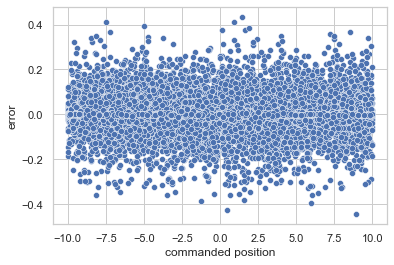

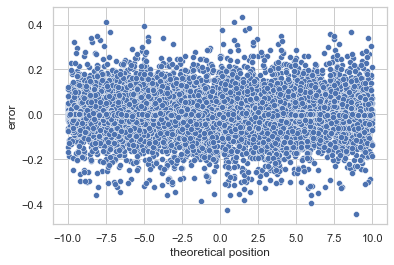

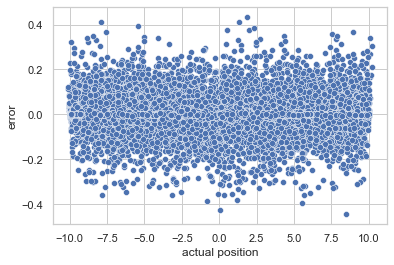

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn styles for the plots
sns.set_theme(style="whitegrid")

# Scatter plot for each feature against the target variable "error"
# Feature: "commanded position" vs "error"
sns.scatterplot(x=data_l['commanded position'], y=data_l['error'])
plt.show()

# Feature: "theoretical position" vs "error"
sns.scatterplot(x=data_l['theoretical position'], y=data_l['error'])
plt.show()

# Feature: "actual position" vs "error"
sns.scatterplot(x=data_l['actual position'], y=data_l['error'])
plt.show()


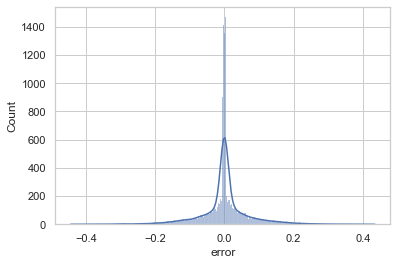

In [ ]:
#Histogram
sns.histplot(data_l['error'], kde=True)
plt.show()

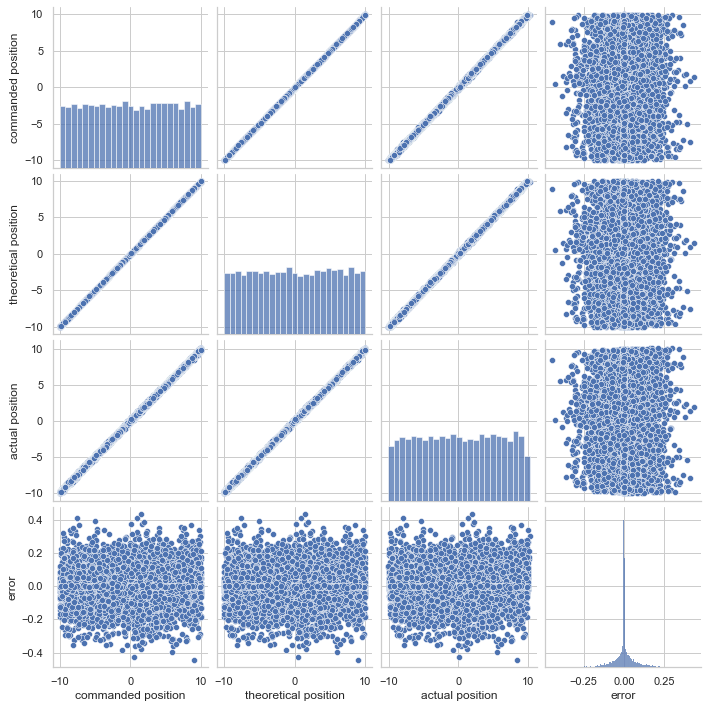

In [ ]:
# Seaborn Pair Plot
sns.pairplot(data_l)
plt.show()

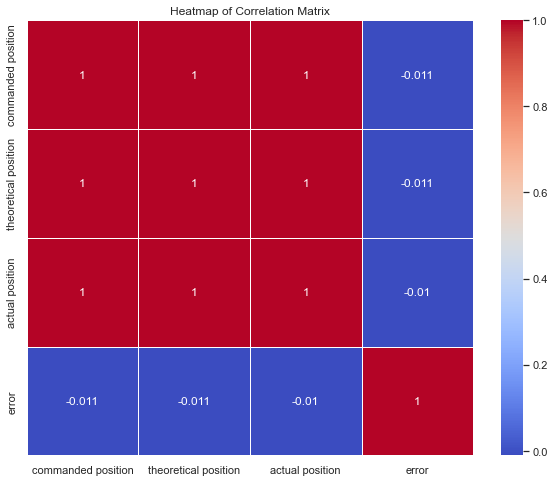

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data_l.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
# Normalize the data
scaler_X_l = MinMaxScaler()
scaler_Y_l = MinMaxScaler()
X_l = scaler_X_l.fit_transform(X_l)
Y_l = scaler_Y_l.fit_transform(Y_l.reshape(-1, 1))

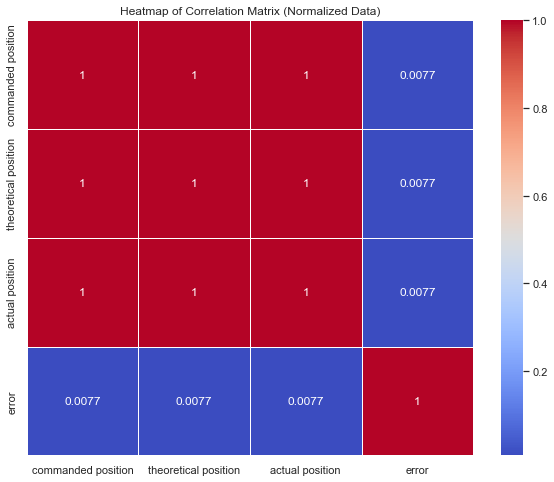

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features (Note that we are not normalizing the target variable 'error')
data_b_normalized = pd.DataFrame(scaler.fit_transform(data_b.iloc[:, :-1]), columns=data_b.columns[:-1])

# Add the target variable 'error' back into the DataFrame
data_b_normalized['error'] = data_b['error'].values

# Now let's visualize the normalized data with a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix_normalized = data_b_normalized.corr()
sns.heatmap(correlation_matrix_normalized, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix (Normalized Data)')
plt.show()


In [ ]:
# Scatter Plot for each feature against the target on normalized data
for feature in features:
    sns.scatterplot(data=data_b_normalized, x=feature, y=target)
    plt.title(f'Scatter Plot of {feature} vs {target} (Normalized Data)')
    plt.show()

# Pair Plot on normalized data
sns.pairplot(data_b_normalized)
plt.show()

In [ ]:
# Split data into training and testing sets
X_train_l, X_test_l, Y_train_l, Y_test_l = train_test_split(X_l, Y_l, test_size=0.2, random_state=42)

In [ ]:
# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_l.shape[1], activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))  # Assuming it's a regression task with one output

In [ ]:
# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_l.shape[1], activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))  # Assuming it's a regression task with one output

In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Train the model
model.fit(X_train_l, Y_train_l, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
375/375 [==============================] - 2s 2ms/step - loss: 0.0097
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 8/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 9/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 10/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 11/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 12/100
375/375 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 13/100


In [ ]:
# Evaluate the model
MSE_train_l = np.mean(np.square(model.predict(X_train_l) - Y_train_l))
MSE_test_l = np.mean(np.square(model.predict(X_test_l) - Y_test_l))
print('MSE on training data:', MSE_train_l)
print('MSE on testing data:', MSE_test_l)

94/94 [==============================] - 0s 1ms/step
MSE on training data: 0.00017921019807527432
MSE on testing data: 0.00016127370395259326


In [ ]:
!pip install google-cloud-bigquery

In [ ]:
!pip install pandas-gbq

   ---------------------------------------- 190.9/190.9 kB 3.8 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.11.0 requires google-auth-oauthlib<0.5,>=0.4.1, but you have google-auth-oauthlib 1.1.0 which is incompatible.
tensorboard 2.11.0 requires protobuf<4,>=3.9.2, but you have protobuf 4.25.1 which is incompatible.
tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.25.1 which is incompatible.


   ---------------------------------------- 24.6/24.6 MB 12.6 MB/s eta 0:00:00
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6


In [ ]:
import numpy as np
import pandas as pd

from google.cloud import bigquery
from google.oauth2 import service_account

# Replace 'your_project' and 'your_dataset' with your project ID and dataset ID
project_id = 'level-footing-406016'
dataset_id = 'level-footing-406016.file1_sample_ds'

# Replace 'your_table' with your table ID
table_id = 'samples'

# Replace 'path/to/your/csv/file.csv' with the path to your CSV file
excel_file_path = 'C:\\Users\\Sanam\\Downloads\\A4988SanamFormatOnly\\A4988SanamFormatOnly\\Jupyter_BS_1_A4988_1_5.0mm_12rpm_4000rpms_.xlsx'

# Read xlsx file
df = pd.read_excel(excel_file_path)

# Save the DataFrame to a CSV file
csv_file_path = 'C:\\Users\\Sanam\\Downloads\\A4988SanamFormatOnly\\A4988SanamFormatOnly\\Jupyter_BS_1_A4988_1_5.0mm_12rpm_4000rpms_.csv'
df.to_csv(csv_file_path, index=False)

# Replace 'path/to/your/credentials.json' with the actual path to your JSON key file
credentials_path = 'C:\\Users\\Sanam\\Downloads\\level-footing-406016-0b81de67bdd9.json'

# Explicitly create credentials
credentials = service_account.Credentials.from_service_account_file(credentials_path)

# Set up the BigQuery client with explicit credentials
client = bigquery.Client(credentials=credentials)

# Get the reference to the destination table
table_ref = f"{project_id}.{dataset_id}.{table_id}"

# Write the DataFrame to BigQuery
df.to_gbq(destination_table=table_ref, project_id=project_id, if_exists='append')

print(f"Data loaded to {table_ref.project}.{table_ref.dataset_id}.{table_ref.table_id}")

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fpydata-google-auth.readthedocs.io%2Fen%2Flatest%2Foauth.html&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=oegEo9RRVuKQXfrkwHDec1QB2U7FHL&prompt=consent&access_type=offline


KeyboardInterrupt: Interrupted by user